In [9]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
def ham( delta_c,delta_p,Omega_c,Omega_p,chi,kappa,gamma) :
    N = 8
    g =basis(2,0)
    e = basis(2,1)
#     term1 = tensor( Qobj( np.diag([1,0])), Qobj( np.diag( -(delta_c+2*chi)*np.linspace(0,N,N+1))))
#     term2 = tensor( Qobj( np.diag([0,1])), Qobj( np.diag( -delta_p-delta_c*(np.linspace(0,N,N+1)-1))))
#     term3 = tensor( Qobj( np.diag([0,1])), Qobj( np.diag( (np.linspace(1,N,N))**0.5, k=-1))) * Omega_c/2
#     temp = np.zeros((N+1,N+1))
#     temp[1, 0] = 1
#     term4 = tensor( Qobj( np.diag([1], k=-1)), Qobj(temp)) * Omega_p/2
#     H = term1 + term2 + term3 + term4 + (term3+term4).dag()
    H = (delta_c+2*chi)*tensor(g*g.dag(),num(N))\
     -delta_p*tensor(e*e.dag( ) , qeye(N) )\
    -delta_c *tensor(e*e.dag(),num(N))\
    +delta_c*tensor(e*e.dag(),qeye(N))\
    +(Omega_c/2)*tensor(e*e.dag(),create(N))\
    +(Omega_p/2)*tensor(create(2),create(N))\
    +(Omega_c/2)*tensor(e*e.dag(),destroy(N))\
    +(Omega_p/2)*tensor(destroy(2),destroy(N))
    p_1=tensor(qeye(2),destroy(N))*np.sqrt(kappa)
    p_2=tensor(destroy(2),qeye(N))*np.sqrt(gamma)
    return H,[p_1,p_2,]
def run():
    N = 50
    M = 50
    e_pop = np.zeros([N,M])
    chi = 4*2*np.pi
    delta_p = np.linspace(-20*2*np.pi, 20*2*np.pi,N+1)
    delta_c = np.linspace(-20*2*np.pi,20*2*np.pi, M+1)
    Omega_p = 1*2*np.pi
    Omega_c = 5*2*np.pi
    kappa = 2.9*2*np.pi
    gamma = 0.1*2*np.pi
    nq=destroy(2)
    mq=nq.dag()*nq
    print(mq)
    for i in range (N) :
        print(i)
        for j in range (M) :
            H,c_op_list=ham(delta_p[j],delta_c[i],
            Omega_p,Omega_c,chi,kappa,gamma)
            result= steadystate(H,c_op_list,solver='scipy')
            #print(result)
            e_pop[j,i] =expect(mq,ptrace(result,0))
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    plt.pcolor(delta_p/(2*np.pi) ,
    delta_c/(2*np.pi),e_pop, edgecolors='none')
    plt.set_cmap( 'RdYlBu_r')
    plt.ylabel( r' $\ Delta_p /\omega$ ', fontsize =20)
    plt.xlabel( r' $\ Delta_c /\omega$ ', fontsize =20)
    plt.axis( 'tight' )
    plt.title('Excitation probabilty of qubit,insteadystate',fontsize=16)
    plt.colorbar()
    plt.show( )
    plt.subplot(122)
    plt.plot(e_pop[25,:])
    
if __name__ == 'main':
    run()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 1.]]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


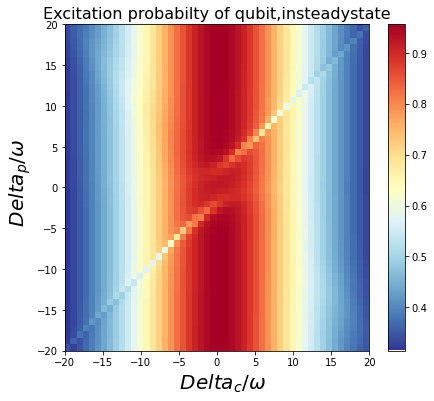

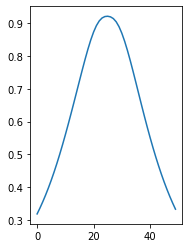

In [10]:
run()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 1.]]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


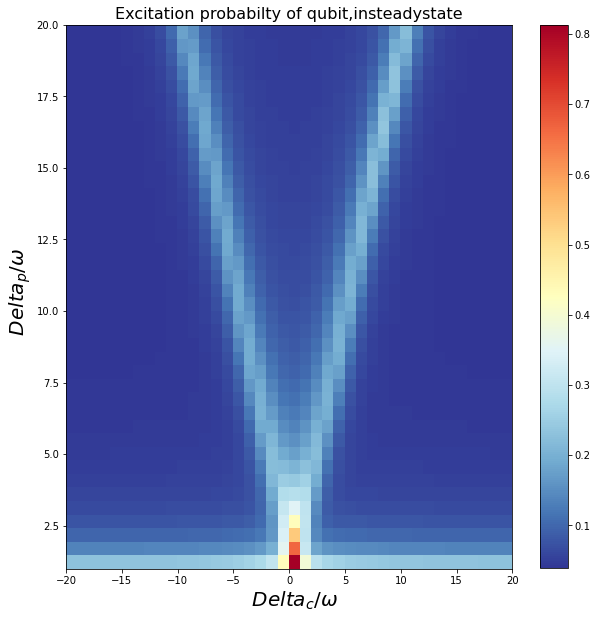

In [46]:
N = 40
M = 40
e_pop = np.zeros([N,M])
chi = -4.1*2*np.pi
delta_p = np.linspace(-20*2*np.pi, 20*2*np.pi,N+1)
delta_c = 0
Omega_p = 2*2*np.pi
Omega_c = np.linspace(1*2*np.pi,20*2*np.pi, M+1)
kappa = 2.5*2*np.pi
gamma = 0.1*2*np.pi
nq=destroy(2)
mq=nq.dag()*nq
print(mq)
for i in range (N) :
    print(i)
    for j in range (M) :
        H,c_op_list=ham(delta_p[i],delta_c,
        Omega_p,Omega_c[j],chi,kappa,gamma)
        result= steadystate(H,c_op_list,solver='scipy')
        #print(result)
        e_pop[j,i] =result[0, 0].real#expect(mq,ptrace(result,0))
fig,ax=plt.subplots(figsize=(10,10))
p = ax.pcolor(np.linspace(-20,20,N+1) ,
np.linspace(1,20,M+1),e_pop, edgecolors='none')
p.set_cmap( 'RdYlBu_r')
ax.set_ylabel( r' $\ Delta_p /\omega$ ', fontsize =20)
ax.set_xlabel( r' $\ Delta_c /\omega$ ', fontsize =20)
ax.axis( 'tight' )
ax.set_title('Excitation probabilty of qubit,insteadystate',fontsize=16)
plt.colorbar(p)
plt.show( )

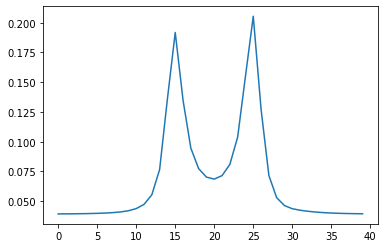

In [48]:
plt.plot(e_pop[20,:])

In [28]:
e_pop[1,:]

array([0.64122523, 0.46246633, 0.58344169, 0.50523505, 0.42558464,
       0.33964274, 0.24973101, 0.16251416, 0.08657575, 0.03529377,
       0.01816633, 0.03846596, 0.09131641, 0.16583777, 0.24943783,
       0.3309395 , 0.40052995, 0.44427265, 0.43296291, 0.37680361])

In [27]:
help(steadystate)

Help on function steadystate in module qutip.steadystate:

steadystate(A, c_op_list=[], method='direct', solver=None, **kwargs)
    Calculates the steady state for quantum evolution subject to the supplied
    Hamiltonian or Liouvillian operator and (if given a Hamiltonian) a list of
    collapse operators.
    
    If the user passes a Hamiltonian then it, along with the list of collapse
    operators, will be converted into a Liouvillian operator in Lindblad form.
    
    Parameters
    ----------
    A : :obj:`~Qobj`
        A Hamiltonian or Liouvillian operator.
    
    c_op_list : list
        A list of collapse operators.
    
    solver : {'scipy', 'mkl'}, optional
        Selects the sparse solver to use.  Default is to auto-select based on
        the availability of the MKL library.
    
    method : str, default 'direct'
        The allowed methods are
    
        - 'direct'
        - 'eigen'
        - 'iterative-gmres'
        - 'iterative-lgmres'
        - 'iterative-bi